In [31]:
from google.colab import files
uploaded = files.upload()

Saving customer.csv to customer.csv


# 5-3. 데이터 분석

### 1) 데이터 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

SalesLog = pd.read_csv("Sales.csv")
SalesLog

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325
...,...,...,...,...,...,...
99840,2022-03-27,2022-03-27,SoccerManager,install,0,dicta630
99841,2022-03-28,2022-03-28,SoccerManager,install,0,tempora976
99842,2022-03-26,2022-03-26,SoccerManager,install,0,iusto840
99843,2022-03-20,2022-03-20,SoccerManager,install,0,nemo273


In [3]:
SalesLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


### 결제금액의 총 액

In [4]:
SalesLog['Payment'].sum()

144443100

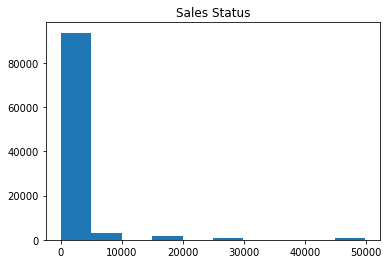

In [5]:
plt.hist(SalesLog['Payment'])
plt.title("Sales Status")
plt.show()

### 무과금을 빼고 다시 한번 히스토그램을 그려보겠습니다.

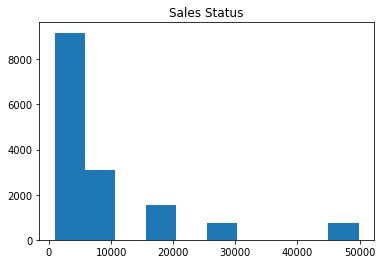

In [12]:
Sales = SalesLog[SalesLog['Payment']!=0]
Sales
plt.hist(Sales['Payment'])
plt.title("Sales Status")
plt.show()

### 이번에는 Box Plot을 통해 결제 금액의 사분위수를 확인해보겠습니다.

In [13]:
Sales['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

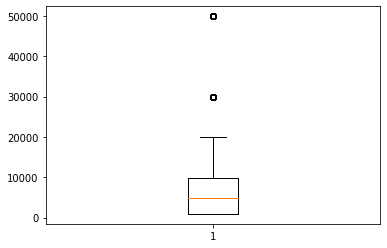

In [14]:
plt.boxplot(Sales['Payment'])
plt.show()

In [17]:
Sales['Payment'].value_counts() / len(Sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

In [22]:
SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]
SalesLog['Payment'].groupby(SalesLog['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

AttributeError: ignored

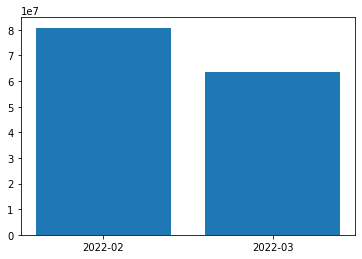

In [24]:
temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

In [26]:
# Sales02변수를 만들고, 2월에 결제한 데이터 할당하기
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02')& (SalesLog['Payment'] != 0)]

Sales02

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
12168,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
12169,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
12170,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
12171,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


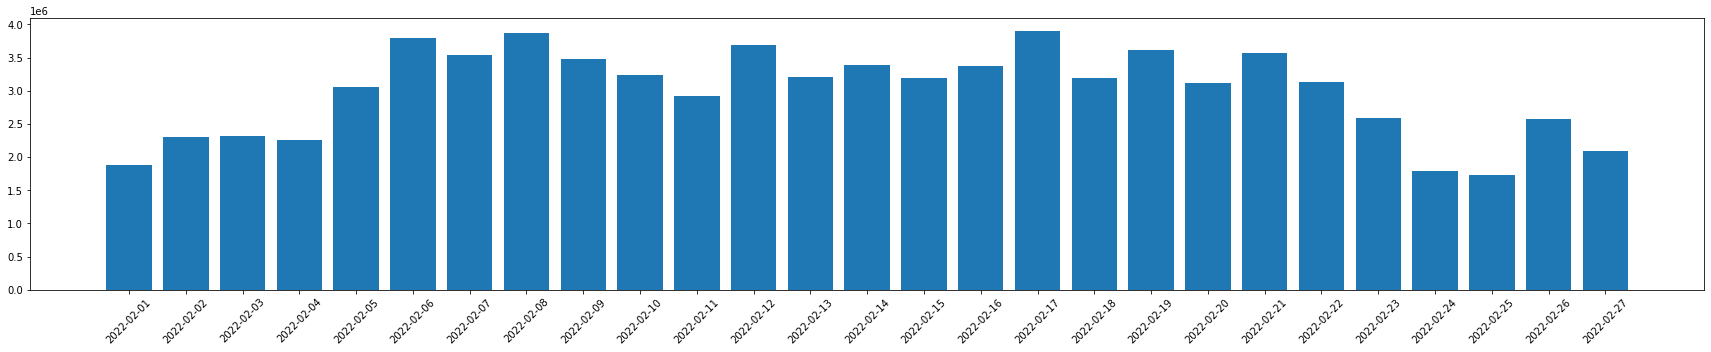

In [28]:
temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index,temp_data)
plt.xticks(rotation=45)
plt.show()

In [29]:
# Sales02변수를 만들고, 2월에 결제한 데이터 할당하기
Sales03 = SalesLog[(SalesLog['Month'] == '2022-03')& (SalesLog['Payment'] != 0)]
Sales03.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-13,2022-03-14,MineGround,play,900,quod578,2022-03
1,2022-02-08,2022-03-21,MineGround,play,9900,saepe705,2022-03
2,2022-01-24,2022-03-20,MineGround,play,19900,voluptates561,2022-03
3,2022-02-05,2022-03-18,MineGround,play,9900,quaerat318,2022-03
4,2022-01-19,2022-03-24,MineGround,play,4900,perspiciatis026,2022-03
...,...,...,...,...,...,...,...
6762,2022-03-21,2022-03-25,SoccerManager,play,9900,a329,2022-03
6763,2022-03-18,2022-03-20,SoccerManager,play,9900,dignissimos737,2022-03
6764,2022-03-17,2022-03-20,SoccerManager,play,900,sequi289,2022-03
6765,2022-03-13,2022-03-16,SoccerManager,play,4900,delectus499,2022-03


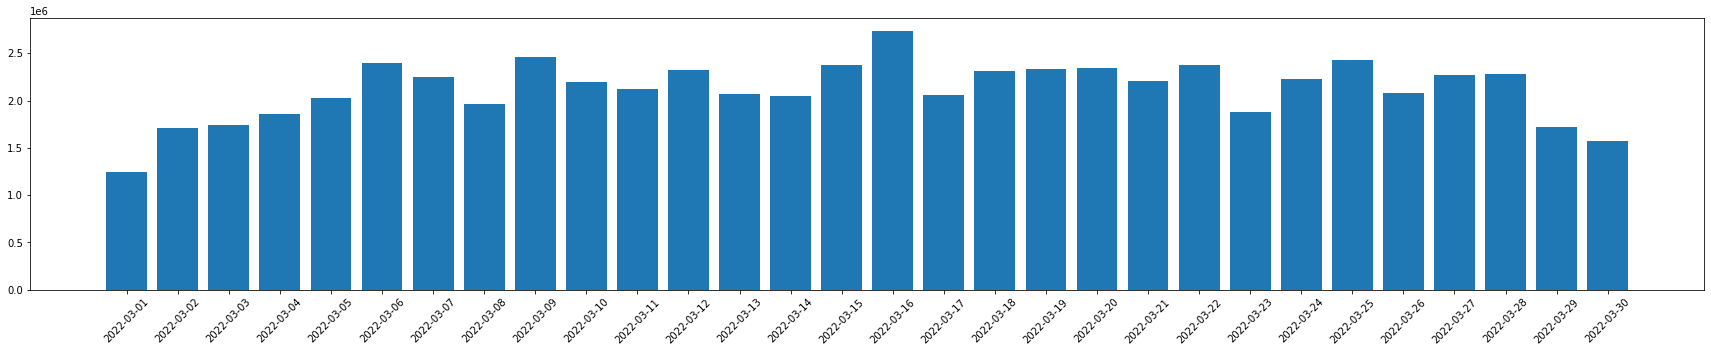

In [30]:
temp_data = Sales03['Payment'].groupby(Sales03['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index,temp_data)
plt.xticks(rotation=45)
plt.show()

### 지금까지는 Sales 데이터를 살펴봤으니 Customer 데이터를 살펴보겠습니다.

In [33]:
CustomerLog = pd.read_csv("customer.csv")
CustomerLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    99845 non-null  object
 1   Name           99845 non-null  object
 2   Nickname       99845 non-null  object
 3   Password       99845 non-null  object
 4   Email          99845 non-null  object
 5   Birth          99845 non-null  object
 6   Gender         99845 non-null  object
 7   C.P.           99845 non-null  object
 8   MobileCompany  99845 non-null  object
 9   OS             99845 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB


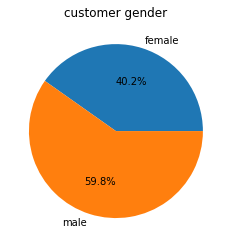

In [37]:
pie_data = CustomerLog.groupby(['Gender']).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.title("customer gender")
plt.show()

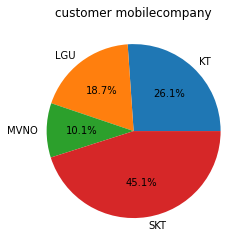

In [38]:
pie_data = CustomerLog.groupby(['MobileCompany']).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.title("customer mobilecompany")
plt.show()

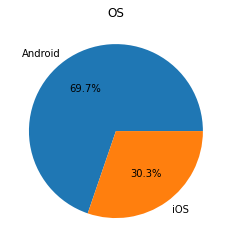

In [39]:
pie_data = CustomerLog.groupby(['OS']).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.title("OS")
plt.show()

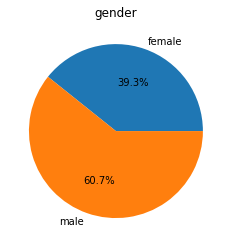

In [41]:
TotalData = pd.merge(CustomerLog,SalesLog)

PaymentCustomer = TotalData[(TotalData["Payment"] != 0)]

pie_data = PaymentCustomer.groupby(['Gender']).count().Name
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')
plt.title("gender")
plt.show()

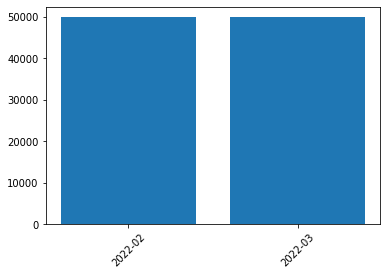

In [49]:
PaymentCustomer['Payment'].groupby([PaymentCustomer['Gender'],PaymentCustomer['Month']]).sum()

male = PaymentCustomer[PaymentCustomer['Gender']=='male']
female = PaymentCustomer[PaymentCustomer['Gender']=='female']

<BarContainer object of 2 artists>

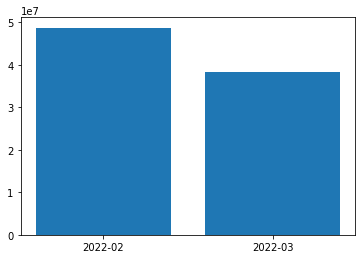

In [51]:
temp_data = male['Payment'].groupby(male['Month']).sum()
plt.bar(temp_data.index,temp_data)